## STEP 1 : Import the required modules

First of all, all the required modules are imported at the top of the notebook to centralise the imports at a single place for convenience.

In [1]:
import pandas as pd

from model.model_definition import preprocess_data
from model.training_validation import create_dataloaders, train_and_validate, plot_curves, initialise_model
from model.inference import embed_image, predict_currency
from utils.helpers import get_device, save_model, save_processed_data
from utils.constants import RAW_FEATHER_DATA_PATH

## STEP 2 : Initialise the device

Then, the device is initialised using the helper function `get_device()` which returns **cuda** if it is available, otherwise returns **cpu** as the fallback for the device to use.

In [2]:
device = get_device()
print("Using device:", device)

Using device: cuda


## STEP 3 : Initialise, preprocess, and save the data

Then, the dataframe is iniliasaed using the `pd.read_feather()` function to read the *raw feather data file*, then the data is preprocessed and split into train and test using the helper function `preprocess_data()`, and finally the processed datasets are saved as `.npy` files using the helper function `save_processed_data()`.

In [3]:
df = pd.read_feather(RAW_FEATHER_DATA_PATH)
X_train, X_test, y_train, y_test = preprocess_data(df)
save_processed_data(X_train, X_test, y_train, y_test)

## STEP 4 : Create dataloaders and initialise the model

After the preprocessing and splitting is done, the train and test dataloaders are created using the helper function `create_dataloaders()`, and then the **_currency detector_ model**, **_cross entropy loss_ criterion**, and **_adam_ optimizer** are initialised using the helper function `initialise_model()`.

In [4]:
train_loader, test_loader, input_dim, output_dim = create_dataloaders(X_train, X_test, y_train, y_test)
model, criterion, optimizer = initialise_model(input_dim, output_dim, device)

## STEP 5 : Train and validate the model in epochs

After the model is initialised, we **train** and **validate** the model in epochs and print out the *loss* and *accuracy* for each epoch using the helper function `train_and_validate()`. Then, we also save the best model state using the helper function `save_model()`.

In [5]:
train_losses, test_losses, train_accuracies, test_accuracies, best_model_state = train_and_validate(
    model, criterion, optimizer, train_loader, test_loader, device
)
save_model(best_model_state)

Epoch 1/20 | Train Loss: 0.6495 | Train Acc: 0.8121 | Test Loss: 0.2233 | Test Acc: 0.9310
Epoch 2/20 | Train Loss: 0.2986 | Train Acc: 0.9161 | Test Loss: 0.1749 | Test Acc: 0.9503
Epoch 3/20 | Train Loss: 0.2293 | Train Acc: 0.9344 | Test Loss: 0.1632 | Test Acc: 0.9501
Epoch 4/20 | Train Loss: 0.2049 | Train Acc: 0.9428 | Test Loss: 0.1507 | Test Acc: 0.9561
Epoch 5/20 | Train Loss: 0.1848 | Train Acc: 0.9455 | Test Loss: 0.1423 | Test Acc: 0.9619
Epoch 6/20 | Train Loss: 0.1650 | Train Acc: 0.9532 | Test Loss: 0.1386 | Test Acc: 0.9595
Epoch 7/20 | Train Loss: 0.1528 | Train Acc: 0.9561 | Test Loss: 0.1381 | Test Acc: 0.9610
Epoch 8/20 | Train Loss: 0.1443 | Train Acc: 0.9576 | Test Loss: 0.1364 | Test Acc: 0.9623
Epoch 9/20 | Train Loss: 0.1374 | Train Acc: 0.9612 | Test Loss: 0.1286 | Test Acc: 0.9649
Epoch 10/20 | Train Loss: 0.1343 | Train Acc: 0.9610 | Test Loss: 0.1363 | Test Acc: 0.9629
Epoch 11/20 | Train Loss: 0.1169 | Train Acc: 0.9670 | Test Loss: 0.1230 | Test Acc: 0.96

## STEP 6 : Plot the loss and accuracy curves

After the training and validation of the model is complete, the **loss curve** and the **accuracy curve** for the *train* and *test* are plotted using the helper function `plot_curves()` which uses `matplotlib` for the data visualisation.

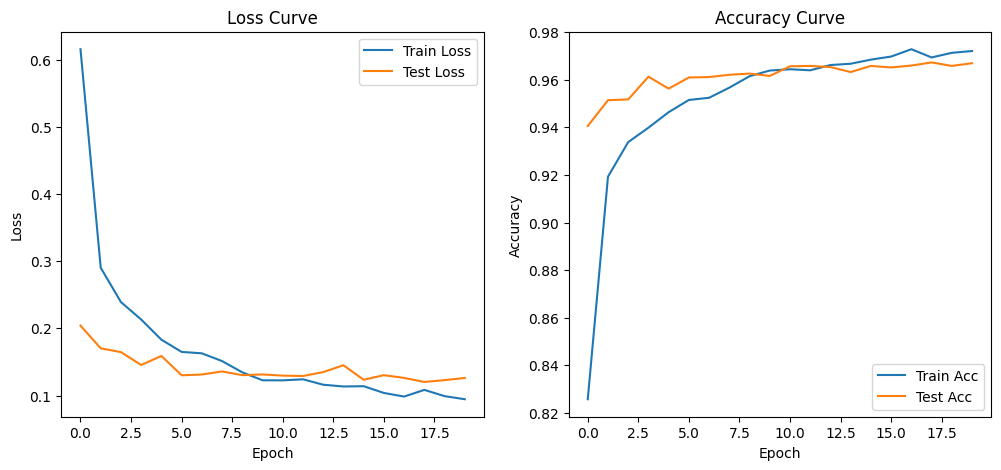

In [6]:
plot_curves(train_losses, test_losses, train_accuracies, test_accuracies)